#### Important topics of the Blog:

Part-1: Introduction of Boosting

Part-2: History (Bagging, Random Forest, Boosting and Gradient Boosting)

Part-3: AdaBoost (Adaptive Boosting)

Part-4: XGBoost

Part-5: LightGBM

Part-6: CatBoost

Part-7: Example of Boosting

#### References:

1. https://en.wikipedia.org/wiki/Bootstrap_aggregating

2. https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

3. https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

4. https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

5. https://arxiv.org/pdf/1603.02754.pdf

6. https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

7. https://towardsdatascience.com/gradient-boosting-machines-gbms-the-eli5-way-c4a21b2e2b0a

<h2>1) Boosting</h2>

### Boosting is a technique which combines several weak learner into a stronger learner.Boosting works in Ensemble methods, which combines several decision trees to produce better predictive performance than utilizing a single decision tree.Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning.

In supervised learning, it convert weak learners to strong ones.Boosting is based on the question posed by Kearns and Valiant (1988, 1989):"Can a set of weak learners create a single strong learner?".

A weak learner is defined to be a classifier that is only slightly correlated with the true classification and strong learner is a classifier that is arbitrarily well-correlated with the true classification. 

Boosting algorithms, today, are one of the most used algorithms for getting state of the art results in a wide varieties of contexts. And it has become a go to method for any machine learning problem or contest to get best results. 

Unlike many ML models which focus on high quality prediction done by a single model, boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.

To understand Boosting, it is crucial to recognize that boosting is a generic algorithm rather than a specific model. Boosting needs us to specify a weak model (e.g. regression, shallow decision trees, etc) and then improves it.

With that sorted out, it is time to explore different definitions of weakness and their corresponding algorithms. In this blog I am introducing two major algorithms: Adaptive Boosting (AdaBoost) and Gradient Boosting.

<h2>2) History</h2>

Boosting is based on the question posed by Kearns and Valiant (1988, 1989): “Can a set of weak learners create a single strong learner?”.

Robert Schapire’s affirmative answer in a 1990 paper to the question of Kearns and Valiant has had significant ramifications in machine learning and statistics, most notably leading to the development of boosting.

With Bagging there are a few other ensemble methods which came around the same time and we can say they are subset of modern Gradient Boosting algorithms, which are:

### 1. Bagging (Bootstrap Aggregating): (i.e. Bootstrapping + Aggregating)

### Bagging History:

Bagging (Bootstrap aggregating) was proposed by Leo Breiman in 1994 to improve classification by combining classifications of randomly generated training sets. 

### introduction:

Bagging is an ensemble meta-algorithm which helps in increasing stability and accuracy. It also helps in reducing variance and thus in reducing over-fitting.

The idea of bagging is then simple: we want to fit several independent models and “average” their predictions in order to obtain a model with a lower variance. However, we can’t, in practice, fit fully independent models because it would require too much data. So, we rely on the good “approximate properties” of bootstrap samples (representativity and independence) to fit models that are almost independent.

It can be used with Neural Networks, Classification and Regression trees, and subset selection in Linear Regression.



When training a model, no matter if we are dealing with a classification or a regression problem, we obtain a function that takes an input, returns an output and that is defined with respect to the training dataset. Due to the theoretical variance of the training dataset (we remind that a dataset is an observed sample coming from a true unknown underlying distribution), the fitted model is also subject to variability: if another dataset had been observed, we would have obtained a different model.

In bagging, if we have N data points and we want to make ‘m’ models, then we will take some fraction of data [mostly, (1–1/e)≈63.2%] from data ‘m’ times and repeat some of the rows in them to make their length equal to N data points (though some of them are redundant). Now, we will train those ‘m’ models on these ‘m’ datasets and then get ‘m’ set of predictions. Then we aggregate those predictions to get final prediction.

First, we create multiple bootstrap samples so that each new bootstrap sample will act as another (almost) independent dataset drawn from true distribution. Then, we can fit a weak learner for each of these samples and finally aggregate them such that we kind of “average” their outputs and, so, obtain an ensemble model with less variance that its components. Roughly speaking, as the bootstrap samples are approximatively independent and identically distributed (i.i.d.), so are the learned base models. Then, “averaging” weak learners outputs do not change the expected answer but reduce its variance (just like averaging i.i.d. random variables preserve expected value but reduce variance).

So, assuming that we have L bootstrap samples (approximations of L independent datasets) of size B denoted




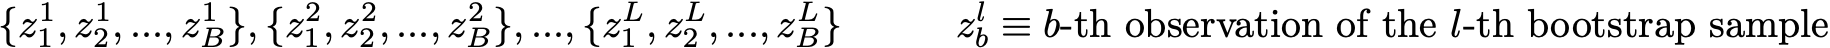





we can fit L almost independent weak learners (one on each dataset) and then aggregate them into some kind of averaging process in order to get an ensemble model with a lower variance. For example, we can define our strong model such that



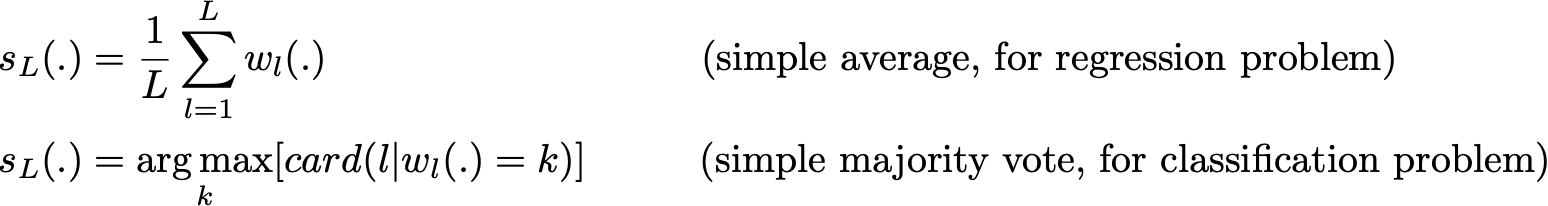


There are several possible ways to aggregate the multiple models fitted in parallel. For a regression problem, the outputs of individual models can literally be averaged to obtain the output of the ensemble model. For classification problem the class outputted by each model can be seen as a vote and the class that receives the majority of the votes is returned by the ensemble model (this is called hard-voting). Still for a classification problem, we can also consider the probabilities of each classes returned by all the models, average these probabilities and keep the class with the highest average probability (this is called soft-voting). Averages or votes can either be simple or weighted if any relevant weights can be used.

Finally, we can mention that one of the big advantages of bagging is that it can be parallelised. As the different models are fitted independently from each others, intensive parallelisation techniques can be used if required.



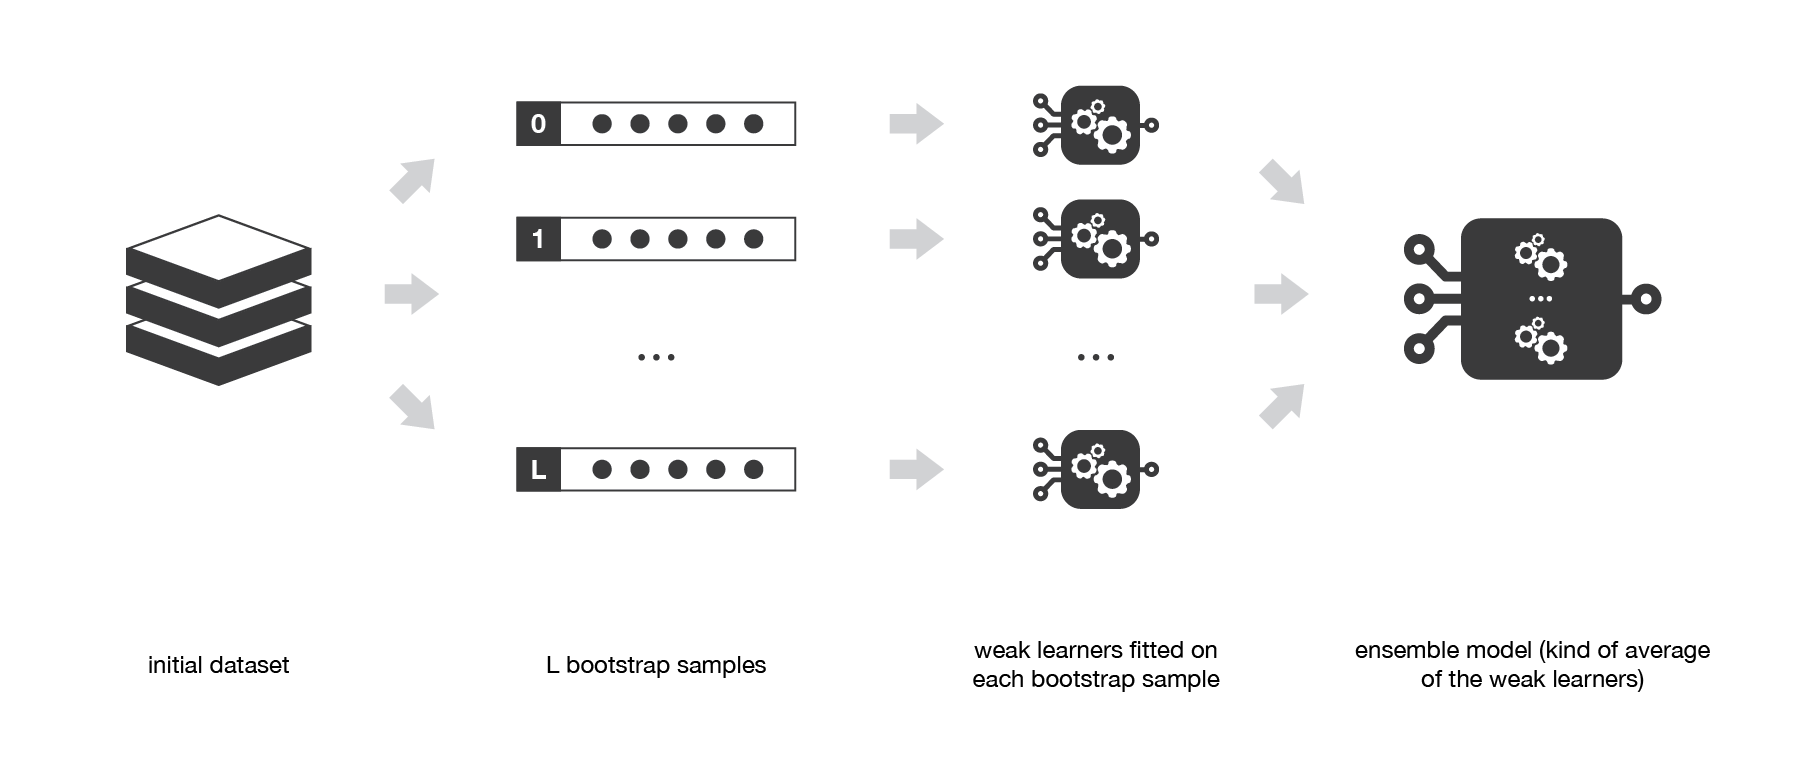



Bootstrap aggregating is designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. 

### Example: Ozone data

To illustrate the basic principles of bagging, below is an analysis on the relationship between ozone and temperature (data from Rousseeuw and Leroy (1986), analysis done in R).

The relationship between temperature and ozone in this data set is apparently non-linear, based on the scatter plot. To mathematically describe this relationship, LOESS smoothers (with bandwidth 0.5) are used. Instead of building a single smoother from the complete data set, 100 bootstrap samples of the data were drawn. Each sample is different from the original data set, yet resembles it in distribution and variability. For each bootstrap sample, a LOESS smoother was fit. Predictions from these 100 smoothers were then made across the range of the data. The first 10 predicted smooth fits appear as grey lines in the figure below. The lines are clearly very wiggly and they overfit the data - a result of the bandwidth being too small. 

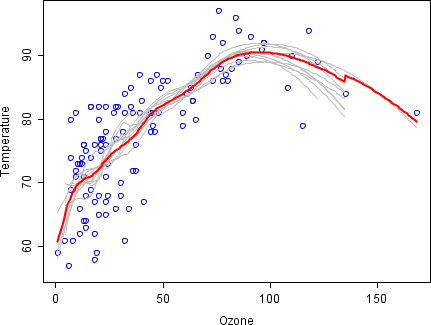

By taking the average of 100 smoothers, each fitted to a subset of the original data set, we arrive at one bagged predictor (red line). Clearly, the mean is more stable and there is less overfit. 


### Conclusion:

#### Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

### 2. Random Forest:

Random forests (or random decision forests) method is an ensemble learning method that operates by constructing a multitude of decision trees. It helps reduce overfitting which is common in Decision Tree models (with high depth value).

Random Forest combines “bagging” idea and random selection of features in order to construct a collection of Decision Trees to counter variance. As in bagging, we make bootstrapped training sets for decision trees, but now for each split that we make in tree generation process we only select a fraction of total number of features [mostly √n or log2(n)].

Bootstrapping and subset selection, makes trees more uncorrelated with each other and helps reduce variance more, and thus reduces overfitting in more generalize-able manner.




Learning trees are very popular base models for ensemble methods. Strong learners composed of multiple trees can be called “forests”. Trees that compose a forest can be chosen to be either shallow (few depths) or deep (lot of depths, if not fully grown). Shallow trees have less variance but higher bias and then will be better choice for sequential methods that we will described thereafter. Deep trees, on the other side, have low bias but high variance and, so, are relevant choices for bagging method that is mainly focused at reducing variance.

The random forest approach is a bagging method where deep trees, fitted on bootstrap samples, are combined to produce an output with lower variance. However, random forests also use another trick to make the multiple fitted trees a bit less correlated with each others: when growing each tree, instead of only sampling over the observations in the dataset to generate a bootstrap sample, we also sample over features and keep only a random subset of them to build the tree.

Sampling over features has indeed the effect that all trees do not look at the exact same information to make their decisions and, so, it reduces the correlation between the different returned outputs. Another advantage of sampling over the features is that it makes the decision making process more robust to missing data: observations (from the training dataset or not) with missing data can still be regressed or classified based on the trees that take into account only features where data are not missing. Thus, random forest algorithm combines the concepts of bagging and random feature subspace selection to create more robust models.

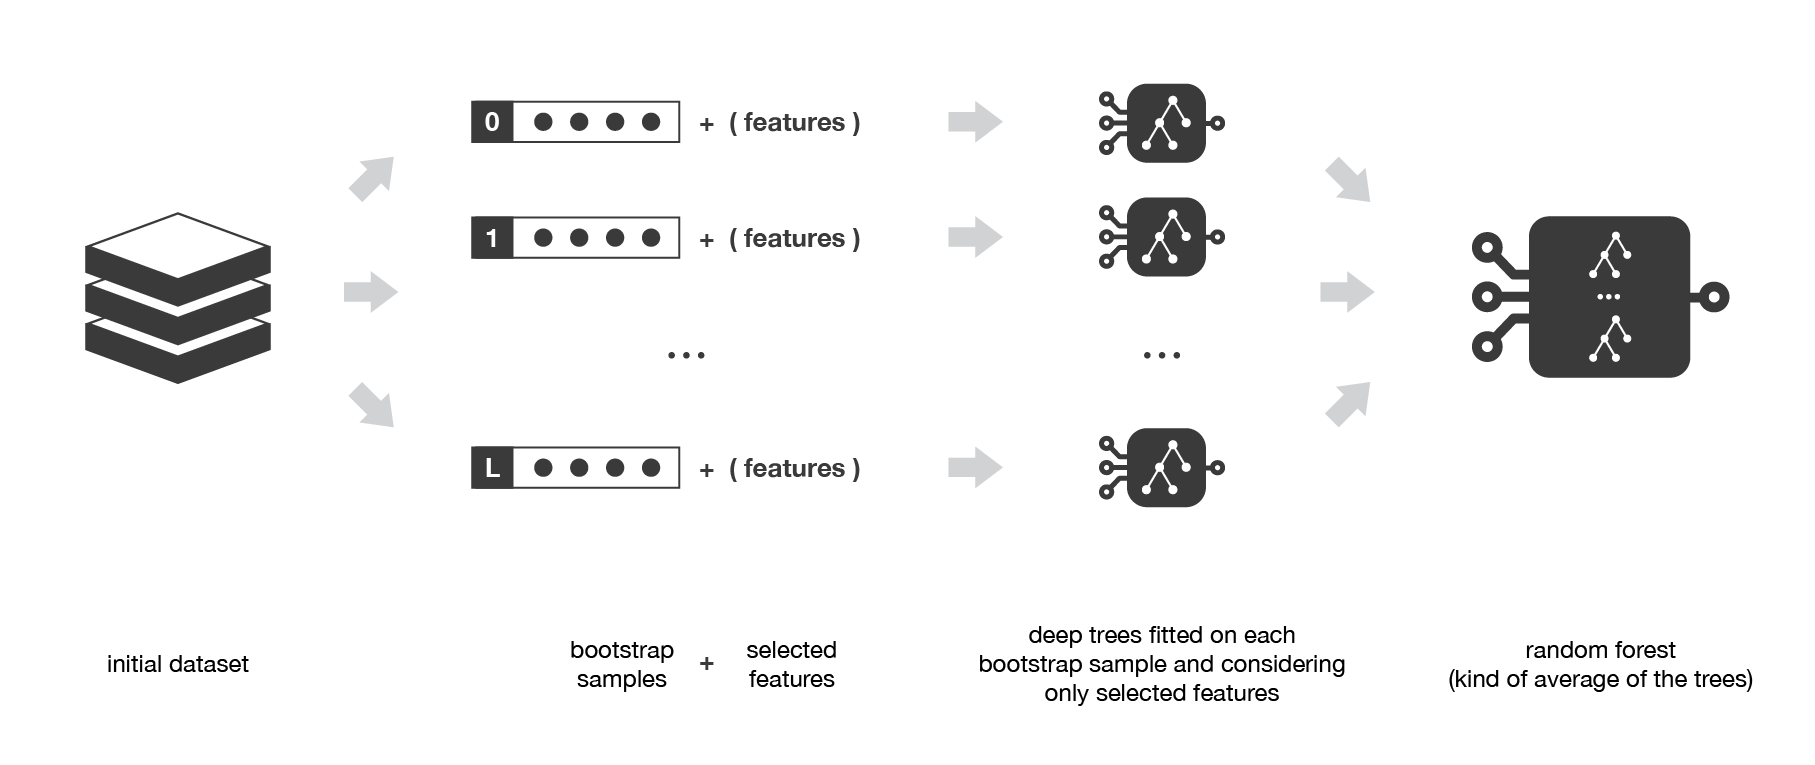


### Example:

Here is a case when we are trying to solve a classification problem. As evident from the image above, our training data has four features- Feature1, Feature 2, Feature 3 and Feature 4. Now, each of our bootstrapped sample will be trained on a particular subset of features. For example, Decision Tree 1 will be trained on features 1 and 4 . DT2 will be trained on features 2 and 4, and finally DT3 will be trained on features 3 and 4. We will therefore have 3 different models, each trained on a different subset of features. We will finally feed in our new test data into each of these models, and get a unique prediction. The prediction that gets the maximum number of votes will be the ultimate decision of the random forest algorithm. For example, DT1 and DT3 predicted a positive class for a particular instance of our test data, while DT2 predicted a negative class. Since, the positive class got the majority number of votes(2), our random forest will ultimately classify this instance as positive.

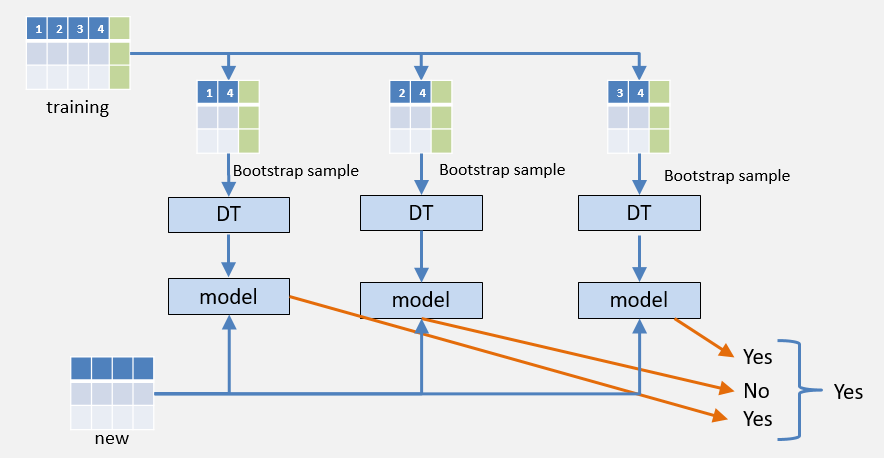


#### steps taken to implement Random forest:

1. Suppose there are N observations and M features in training data set. First, a sample from training data set is taken randomly with replacement.

2. A subset of M features are selected randomly and whichever feature gives the best split is used to split the node iteratively.

3. The tree is grown to the largest.

4. Above steps are repeated and prediction is given based on the aggregation of predictions from n number of trees.

#### Advantages of using Random Forest technique:

1. Handles higher dimensionality data very well.
    
    
2. Handles missing values and maintains accuracy for missing data.

#### Disadvantages of using Random Forest technique:

1. Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the regression model.






### Conclusion:

###### The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

### 3. Boosting: 

Above methods were using averaging of mutually exclusive models in order to reduce variance. Boosting is a little bit different. Boosting is a sequential ensemble method. For ‘n’ number of total trees, we add trees predictions in a sequential method (i.e. we add second tree to improve performance of first tree or we can say to tries to right the wrong of first tree, and so on). So what we do is, we subtract the prediction of first model multiplied by a constant (0<λ≤1) from the target values and then taking these values as target value we fit second model, and so on. We can see it as: new models trying to correct previous models/previous model’s mistakes. Boosting can be nearly summarized by one formula:

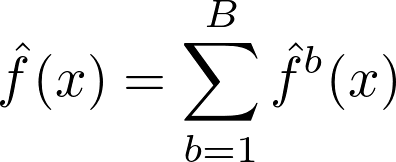

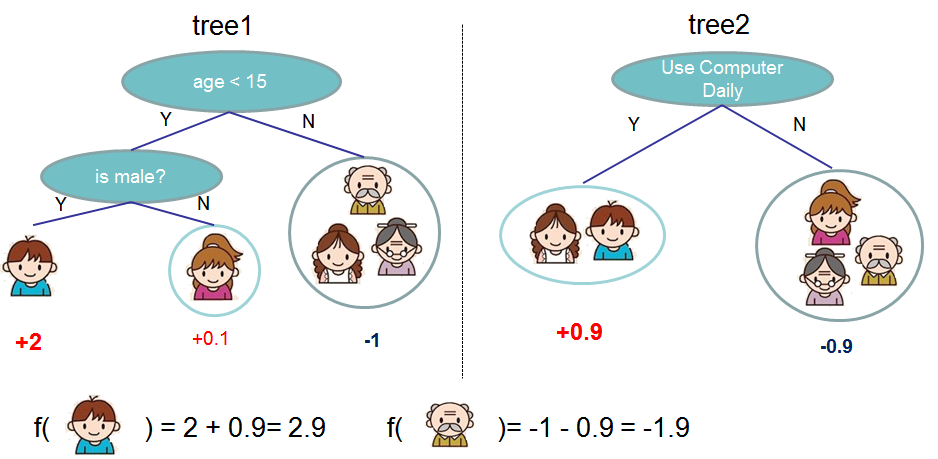

I.e. final predictions are summation of predictions of all the models, each multiplied by a small constant (0<λ≤1). This is another way of looking at Boosting algorithm.

So, actually we try to learn small amount of information about target from each learner (which are all weak learners) which are trying to improve upon previous models and then sum them all to get final predictions (this is possible because we are fitting only to residuals from previous models). 

Boosting methods work in the same spirit as bagging methods: we build a family of models that are aggregated to obtain a strong learner that performs better. However, unlike bagging that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). Boosting, like bagging, can be used for regression as well as for classification problems.

Being mainly focused at reducing bias, the base models that are often considered for boosting are models with low variance but high bias. For example, if we want to use trees as our base models, we will choose most of the time shallow decision trees with only a few depths. Another important reason that motivates the use of low variance but high bias models as weak learners for boosting is that these models are in general less computationally expensive to fit (few degrees of freedom when parametrised). Indeed, as computations to fit the different models can’t be done in parallel (unlike bagging), it could become too expensive to fit sequentially several complex models.

Once the weak learners have been chosen, we still need to define how they will be sequentially fitted (what information from previous models do we take into account when fitting current model?) and how they will be aggregated (how do we aggregate the current model to the previous ones?). We will discuss these questions in the two following subsections, describing more especially two important boosting algorithms: adaboost and gradient boosting.

In a nutshell, these two meta-algorithms differ on how they create and aggregate the weak learners during the sequential process. Adaptive boosting updates the weights attached to each of the training dataset observations whereas gradient boosting updates the value of these observations. This main difference comes from the way both methods try to solve the optimisation problem of finding the best model that can be written as a weighted sum of weak learners.

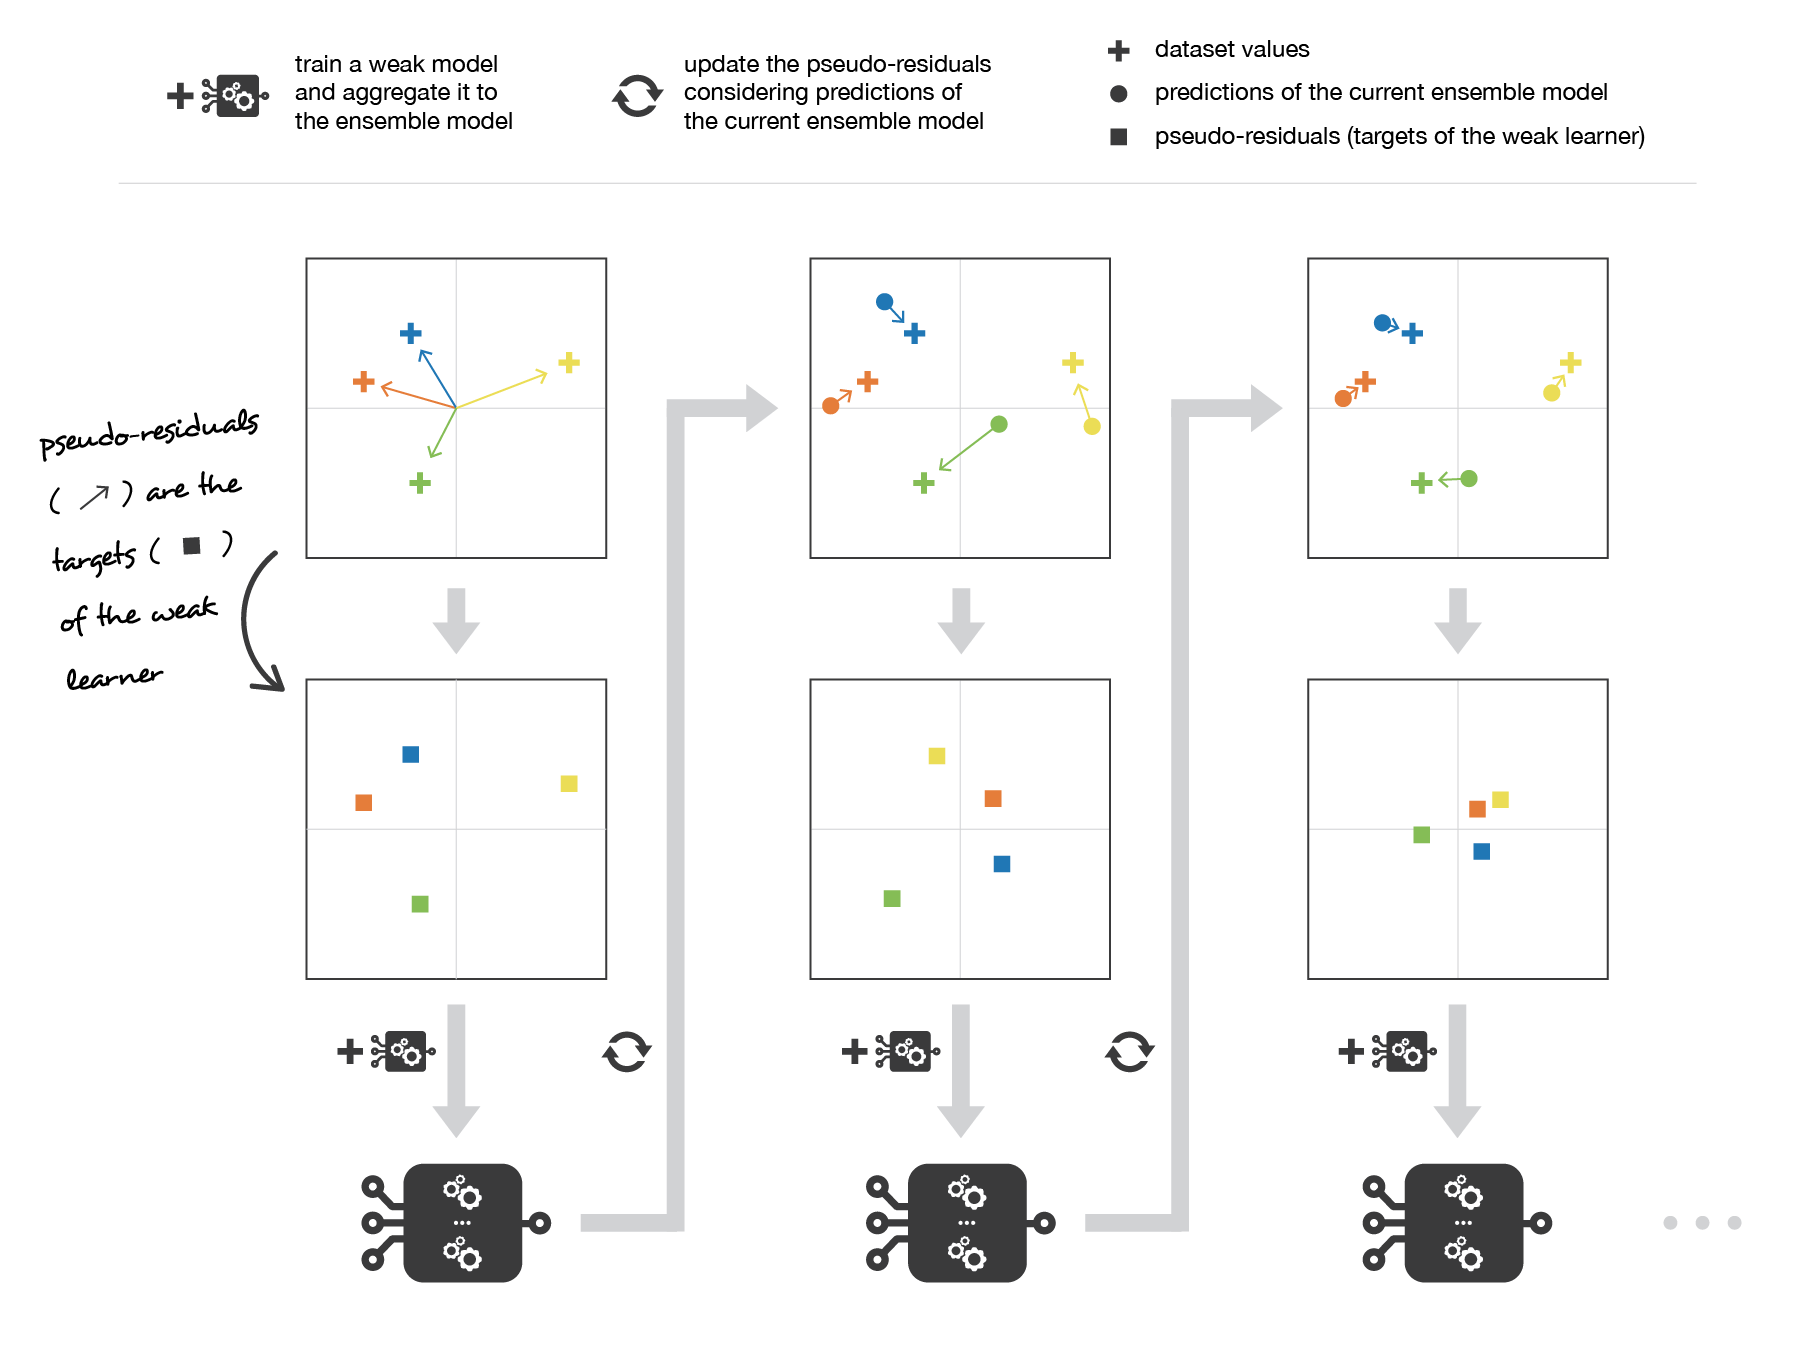

### Conclusion:

###### Boosting is a technique which combines several weak learner into a stronger learner.Boosting works in Ensemble methods, which combines several decision trees to produce better predictive performance than utilizing a single decision tree.Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning.

### 4. Gradient Boosting: 

In gradient boosting, we take a loss function that is evaluated at every cycle of fitting (like in Deep Learning). First paper on Gradient Boosting by Jerome H. Friedman focused on additive expansion of the final function, similar to what we saw above.

Gradient boosting sequentially fits weak learners to the gradient (derivative) of a loss function in an attempt to explain the patterns missed by the previous weak learner. An additive model is used to ensemble the weak learners as each one is fit. The output of the new weak learned is added to the output of the previous weak learner to adjust the predictions. This results in a recursive equation where each weak learner attempts to explains a pattern not picked up by the previous ones.

We first predict a target value (say, γ), a constant which gives least error (i.e. first prediction is F0 = γ). After that we calculate gradients for every point in our dataset w.r.t. our previous output. So, we calculate gradient of error function with error calculated between prediction and sum of all outputs of previous models, w.r.t. sum of all outputs of previous models, which in case of Square Error will be:

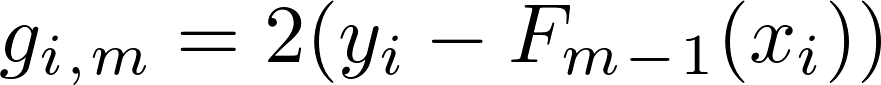

gradient w.r.t. sum of all values for that data point (i.e. ith gradient)

Gradient boosting sequentially fits weak learners to the gradient (derivative) of a loss function in an attempt to explain the patterns missed by the previous weak learner. An additive model is used to ensemble the weak learners as each one is fit. The output of the new weak learned is added to the output of the previous weak learner to adjust the predictions. This results in a recursive equation where each weak learner attempts to explains a pattern not picked up by the previous ones.

Gradient boosting, It is also a sequential technique. However at each iteration a new predictor is fitted to the residual errors made by the previous predictor, instead of the instance weights being used.

####  The overall algorithm is as follows:

1. Fit decision tree regressor to the training set
    
2. Train a second decision tree regressor on the residual errors made by 1.
    
3. Train a third regressor on the residual errors made by 2.
    
4. Use this ensemble of three trees to make predictions on the new instance by adding up predictions of all the trees.

### Conclusion:

###### Gradient boosting, It is also a sequential technique. However at each iteration a new predictor is fitted to the residual errors made by the previous predictor, instead of the instance weights being used.

### 3) AdaBoost (Adaptive Boosting)

This is the first Boosting algorithm which made a huge mark in ML world. It was developed by Freund and Schapire (1997).

AdaBoost fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.


AdaBoosting is the simplest effective boosting algorithm for binary classification. It sequentially fits decision trees with one split. These little weak learner trees are called “decision stumps”. Each observation in the training observation receives a weight based on the classification error, and the next decision stump is trained using the updated weights on the training data. Each stump is also assigned a weight based on the classifiers total misclassification rate. The model then ensembles the predictions using the weights on each stump. Stumps with a high number of misclassifications receive lower weights, causing their predictions to contribute less in the ensembled prediction.

In addition to sequentially adding model’s predictions (i.e. Boosting) it adds weights to each prediction. It was originally designed for classification problems, where they increased weights of all miss-classified examples and reduced weights of all data points classified correctly (though it can be applied to regression too). So, the next model will have to focus more on examples with more weight and less on examples with less weight.

They also have a constant to shrink every tree’s predictions, whose values is calculated during fitting and depend on error they get after fitting. More the error less is the value of constant for that tree. This makes predictions more accurate as we are learning less from less accurate models and learning more from more accurate learners.

The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore Tree 1 + Tree 2. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models.

It was originally for two class classification and chose outputs as {-1, +1}, where:

1. It starts with equal weight for every data point = 1/N (where, N: no. of data points),

2. Then it fits first classification model, h_0(x), to the training data using initial weights (which are same initially),
    
3. Then it calculates total error and based on that update weights for all data points (i.e. we increase weight of misclassified and decrease weight of those correctly classified). Total error also becomes useful in calculating shrinkage constant for predictions of that particular tree. (i.e. we calculate constant, say α, which is small for large errors and vice versa, and is used both in shrinkage and weight calculation)

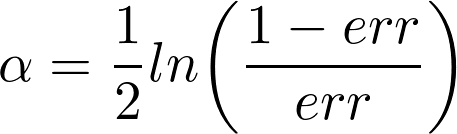

4. Finally current round’s predictions are added to previous predictions after multiplying with α. As it was originally to classify as +1 or -1, it takes sign of predictions after last round as final prediction:

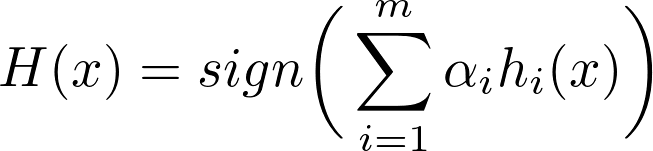

###### This diagram explains Ada-boost. Let’s understand it closely:

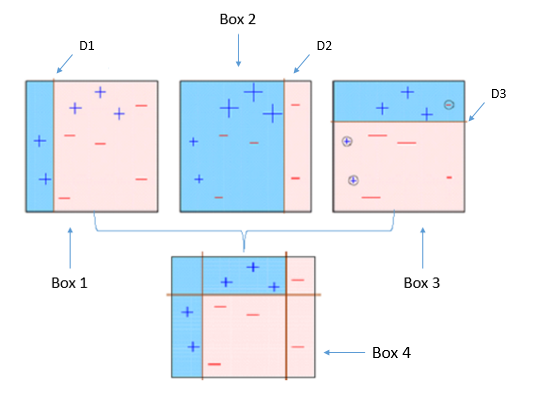

Box 1: We can see that we have assigned equal weights to each data point and applied a decision stump to classify them as + (plus) or – (minus). The decision stump (D1) has generated vertical line at left side to classify the data points. We see that, this vertical line has incorrectly predicted three + (plus) as – (minus). In such case, we’ll assign higher weights to these three + (plus) and apply another decision stump.

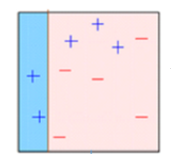

Box 2: Here, we can see that the size of three incorrectly predicted + (plus) is bigger as compared to rest of the data points. In this case, the second decision stump (D2) will try to predict them correctly. Now, a vertical line (D2) at right side of this box has classified three mis-classified + (plus) correctly. But again, it has caused mis-classification errors. This time with three -(minus). Again, we will assign higher weight to three – (minus) and apply another decision stump.

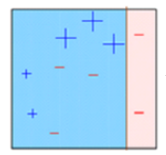

Box 3: Here, three – (minus) are given higher weights. A decision stump (D3) is applied to predict these mis-classified observation correctly. This time a horizontal line is generated to classify + (plus) and – (minus) based on higher weight of mis-classified observation.

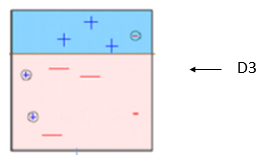

Box 4: Here, we have combined D1, D2 and D3 to form a strong prediction having complex rule as compared to individual weak learner. We can see that this algorithm has classified these observation quite well as compared to any of individual weak learner.

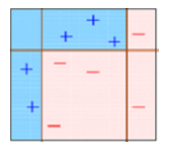

### Difference Bitween AdaBoosting and Gradient Boosting

The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. For example, if we are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices. Similarly, if our goal is to classify credit defaults, then the loss function would be a measure of how good our predictive model is at classifying bad loans. One of the biggest motivations of using gradient boosting is that it allows one to optimise a user specified cost function, instead of a loss function that usually offers less control and does not essentially correspond with real world applications.

### Conclusion:

###### AdaBoost fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

### 4) XGBoost

XGBoost stands for Extreme Gradient Boosting. XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

XGBoost algorithm was developed as a research project at the University of Washington. Tianqi Chen and Carlos Guestrin presented their paper at SIGKDD Conference in 2016 and caught the Machine Learning world by fire. Since its introduction, this algorithm has not only been credited with winning numerous Kaggle competitions but also for being the driving force under the hood for several cutting-edge industry applications. As a result, there is a strong community of data scientists contributing to the XGBoost open source projects with ~350 contributors and ~3,600 commits on GitHub. The algorithm differentiates itself in the following ways:

1. A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.
    
2. Portability: Runs smoothly on Windows, Linux, and OS X.
    
3. Languages: Supports all major programming languages including C++, Python, R, Java, Scala, and Julia.
    
4. Cloud Integration: Supports AWS, Azure, and Yarn clusters and works well with Flink, Spark, and other ecosystems.
    
XGBoost tries to improve upon previous Gradient Boosting algorithms, to give better, faster and more generalizable results.

It uses some different and some new additions to Gradient Boosting, such as:

###### a) Regularized Learning Objective:

As in many other objective function’s implementations, here it proposes to add an extra function to the loss function to penalize complexity of the model(like in LASSO, Ridge, etc), known as the regularization term. This helps models not to overfit the data.

###### b) Shrinkage and Column subsampling:

It also adds shrinkage for every tree, to decrease influence of one particular tree, and subsampling of columns to combat overfitting and decrease variance as discussed in History section.

###### c) Different split finding algorithm:

Gradient Boosting algorithms goes through all possible splits to find the best split at that level. However, this can be a expensive bottleneck if our data is very large, so many algorithms use some kind of approximation or some other trick to find, not best but, a particularly good split. So, XGBoost looks at a particular feature’s distribution and selects some percentiles (or quantiles) as splitting points.

###### d) For speed enhancement and space efficiency:

It proposes to divide data into blocks, in-memory blocks. Data in each block is stored in Compressed Column (CSC) format, in which each column is stored by corresponding feature value. So, a linear search of the column in block is sufficient to get all split points of that column, for that block.

Block format makes it easy to find all splits in linear time, but when it is turn to get gradient statistics for those points, it becomes a non-continuous fetches of gradient statistics (because gradients are still in previous format, where block-values have pointer to their gradient) which can lead to cache-misses. To overcome this problem, they made a Cache Aware algorithm for gradient accumulations. In it, every thread is given an internal buffer. This buffer is used to get gradients in mini-batch manner and accumulate them, in contrast to accessing some gradient from here and then some gradient from there in order.

Finding the best size of block is also a problem which can help use parallelism the best and reduces cache-misses the most.

It also proposes something called Block Sharding. It writes data on multiple disks alternatively (if we have those). So, when it wants to read some data, this setup can help read multiple blocks at the same time. For example if we have 4 disks, then those four disks can read 4 blocks in one unit time, giving 4x speedup.

<h2>How does XGBoost work?</h2>

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

When using gradient boosting for regression, the weak learners are regression trees, and each regression treemaps an input data point to one of its leafs that contains a continuous score. XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions). The training proceeds iteratively, adding new trees that predict the residuals or errors of prior trees that are then combined with previous trees to make the final prediction. It’s called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models. 

<h2>Why does XGBoost perform so well?</h2>

XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.

When it comes to Machine Learning (or even life for that matter), there is no free lunch. As Data Scientists, we must test all possible algorithms for data at hand to identify the champion algorithm. Besides, picking the right algorithm is not enough. We must also choose the right configuration of the algorithm for a dataset by tuning the hyper-parameters. Furthermore, there are several other considerations for choosing the winning algorithm such as computational complexity, explainability, and ease of implementation. This is exactly the point where Machine Learning starts drifting away from science towards art, but honestly, that’s where the magic happens!

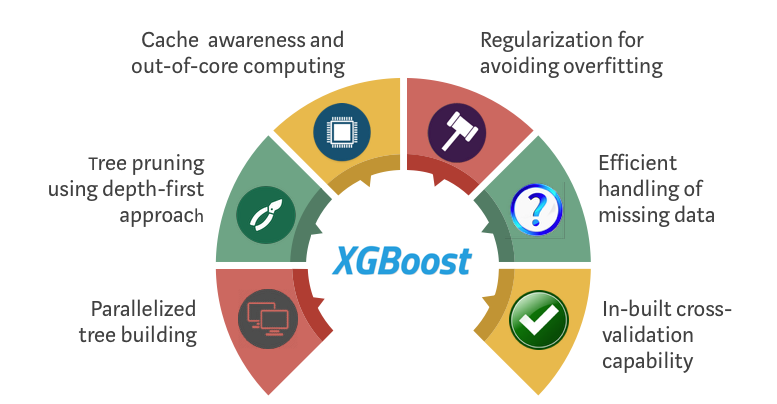

###### What makes the XGBoost so popular?

1. Speed and Performance
    
2. core algorithm is parallelizable
    
3. It has both linear model solver and tree learning algorithms. So, what makes it fast is its capacity to do parallel computation on a single machine
    
4. state of the art performance in many ML tasks

###### Model Features of XGBOOST

The implementation of the model supports the features of the scikit-learn and R implementations, with new additions like regularization. Three main forms of gradient boosting are supported:

1. Gradient Boosting algorithm also called gradient boosting machine including the learning rate.
    
2. Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.
    
3. Regularized Gradient Boosting with both L1 and L2 regularization.

###### Algorithm Features of XGBOOST

The implementation of the algorithm was engineered for efficiency of compute time and memory resources. A design goal was to make the best use of available resources to train the model. Some key algorithm implementation features include:

1. Sparse Aware implementation with automatic handling of missing data values.
    
2. Block Structure to support the parallelization of tree construction.
    
3. Continued Training so that we can further boost an already fitted model on new data.


###### FEATURES of XGBOOST


1. Parallelization of tree construction using all of Our CPU cores during training.
    
2. Distributed Computing for training very large models using a cluster of machines.
    
3. Out-of-Core Computing for very large datasets that don’t fit into memory.
    
4. Cache Optimization of data structures and algorithm to make best use of hardware.

5. Speed: it can automatically do parallel computation on Windows and Linux, with OpenMP. It is generally over 10 times faster than the classical gbm

6. Sparsity: it accepts sparse input for both tree booster and linear booster, and is optimized for sparse input ;
    
7. Customization: it supports customized objective functions and evaluation functions.

8. Has API in several languages:

    Python,
    R,
    Java
    
###### The two reasons to use XGBoost are:

1. Execution Speed.
2. Model Performance.

### Conclusion:

###### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. It is designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost  solve many data science problems in a fast and accurate way.

### 5) LightGBM

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.

For first one, it proposes a method in which they won’t have to use all data points for a particular model, without loosing much information gain. It’s named Gradient Based One Side Sampling (GOSS). In it, they calculate gradients of the loss function and then sort them by their absolute value. It also has a proof to prove that values having larger value of gradient contribute more to information gain, so it proposes to ignore many data points with low gradient for that particular model.

So, take some fraction of top gradients and a different fraction from remaining (randomly from remaining gradients) for a particular model, with some low weight applied to random set of gradients as they have lower value of gradients and should not contribute much to our current model.

One thing to note here is that LightGBM uses histogram-based algorithms, which bucket continuous feature values into discrete bins. This speeds up training and reduces memory usage.

Also, they use a different kind of Decision Tree which optimizes leaf wise instead of depth wise that normal Decision Tree does. (i.e. it enumerates all possible leaves and selects the one with least error)

For the second one, it proposes a method in which to combine many features to make one new feature, thus reducing dimentionality of the data without much information loss. This method is called Exclusive Feature Bundling (EFB). It says that, in world of High Dimentional data there are a lot of columns that are mutually exclusive. How? As, high dimentional data has many columns which are highly sparse, there can be many columns present in data which are not taking any value at the same time (i.e. only one of them is taking a non-zero value most of the time, i.e. mutually exclusive). So, they have proposed to bundle such features into one, which don’t have conflict above some pre-specified value (i.e. they don’t have some non-zero value at same data point for many points. i.e. they are not fully mutually-exclusive, but mutually-exclusive till some level). Still to distinguish each value from different features, it proposes to add a different constant to values coming from different features, so values from one feature will be in one particular range and values from other features will not be in that range. For example, say we have 3 features to combine and all are between 0–100. So, we will add 100 to second feature and 200 to third feature to get three ranges for 3 features, equal to [0, 100), [100, 200) and [200, 300). And in tree based model this is acceptable, as it won’t affect information gain by splitting.

The sklearn API for LightGBM provides a parameter-

boosting_type (LightGBM), booster (XGBoost): to select this predictor algorithm. Both of them provide us the option to choose from — gbdt, dart, goss, rf (LightGBM) or gbtree, gblinear or dart (XGBoost).

###### 1. Advantages of Light GBM


1. Faster training speed and higher efficiency: Light GBM use histogram based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.
    
2. Lower memory usage: Replaces continuous values to discrete bins which result in lower memory usage.
    
3. Better accuracy than any other boosting algorithm: It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy. However, it can sometimes lead to overfitting which can be avoided by setting the max_depth parameter.

4. Compatibility with Large Datasets: It is capable of performing equally good with large datasets with a significant reduction in training time as compared to XGBOOST.

5. Parallel learning supported.

###### 2. Important Parameters of light GBM

1. task : default value = train ; options = train , prediction ; Specifies the task we wish to perform which is either train or prediction.

2. application: default=regression, type=enum, options= options :
        regression : perform regression task
        binary : Binary classification
        multiclass: Multiclass Classification
        lambdarank : lambdarank application
    
3. data: type=string; training data , LightGBM will train from this data
    
4. num_iterations: number of boosting iterations to be performed ; default=100; type=int
   
5. num_leaves : number of leaves in one tree ; default = 31 ; type =int
    
6. device : default= cpu ; options = gpu,cpu. Device on which we want to train our model. Choose GPU for faster training.

7. max_depth: Specify the max depth to which tree will grow. This parameter is used to deal with overfitting.
    
8. min_data_in_leaf: Min number of data in one leaf.
   
9. feature_fraction: default=1 ; specifies the fraction of features to be taken for each iteration
    
10. bagging_fraction: default=1 ; specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
   
11. min_gain_to_split: default=.1 ; min gain to perform splitting
    
12. max_bin : max number of bins to bucket the feature values.
    
13. min_data_in_bin : min number of data in one bin
    
14. num_threads: default=OpenMP_default, type=int ;Number of threads for Light GBM.

15. label : type=string ; specify the label column
    
16. categorical_feature : type=string ; specify the categorical features we want to use for training our model
    
17. num_class: default=1 ; type=int ; used only for multi-class classification

###### 3. Tuning Parameters of Light GBM

Light GBM uses leaf wise splitting over depth wise splitting which enables it to converge much faster but also leads to overfitting. So here is a quick guide to tune the parameters in Light GBM.
###### For best fit

1. num_leaves : This parameter is used to set the number of leaves to be formed in a tree. Theoretically relation between num_leaves and max_depth is num_leaves= 2^(max_depth). However, this is not a good estimate in case of Light GBM since splitting takes place leaf wise rather than depth wise. Hence num_leaves set must be smaller than 2^(max_depth) otherwise it may lead to overfitting. Light GBM does not have a direct relation between num_leaves and max_depth and hence the two must not be linked with each other.
    
2. min_data_in_leaf : It is also one of the important parameters in dealing with overfitting. Setting its value smaller may cause overfitting and hence must be set accordingly. Its value should be hundreds to thousands of large datasets.
    
3. max_depth: It specifies the maximum depth or level up to which tree can grow.

###### For faster speed

1. bagging_fraction : Is used to perform bagging for faster results
    
2. feature_fraction : Set fraction of the features to be used at each iteration
    
3. max_bin : Smaller value of max_bin can save much time as it buckets the feature values in discrete bins which is computationally inexpensive.

 
###### For better accuracy

1. Use bigger training data
    
2. num_leaves : Setting it to high value produces deeper trees with increased accuracy but lead to overfitting. Hence its higher value is not preferred.
    
3. max_bin : Setting it to high values has similar effect as caused by increasing value of num_leaves and also slower our training procedure.


###### Difference Bitween XGBoost vs LightGBM

XGBoost is a very fast and accurate ML algorithm, but it’s now challenged by LightGBM — which runs even faster (for some datasets, it’s 10X faster based on their benchmark), with comparable model accuracy, and more hyperparameters for users to tune. The key difference in speed is because XGBoost split the tree nodes one level at a time, and LightGBM does that one node at a time.

So XGBoost developers later improved their algorithms to catch up with LightGBM, allowing users to also run XGBoost in split-by-leaf mode (grow_policy = ‘lossguide’). Now XGBoost is much faster with this improvement, but LightGBM is still about 1.3X — 1.5X the speed of XGB based on my tests on a few datasets. (Welcome to share our test outcomes!)

The readers can go with either option with their own preference. One more thing to add here: XGBoost has a feature that LightGBM lacks — “monotonic constraint”. It will sacrifice some model accuracy and increase training time, but may improve model interpretability.

###### “Weak Predictors”

A weak predictor is a simple prediction model that just performs better than random guessing. Now, we want the individual predictors inside GBMs to be weak, so that the overall GBM model can be strong.

#### parameters that we can tune to control overfitting.

These are the parameters that we need to tune to make the right predictors (as discussed before, these simple predictors are decision trees):

1. max_depth (both XGBoost and LightGBM): This provides the maximum depth that each decision tree is allowed to have. A smaller value signifies a weaker predictor.
   
2. min_split_gain (LightGBM), gamma (XGBoost): Minimum loss reduction required to make a further partition on a leaf node of the tree. A lower value will result in deeper trees.
    
3. num_leaves (LightGBM): Maximum tree leaves for base learners. A higher value results in deeper trees.
    
4. min_child_samples (LightGBM): Minimum number of data points needed in a child (leaf) node. According to the LightGBM docs, this is a very important parameter to prevent overfitting.

### Subsampling

Even after tuning all the above parameters correctly, it might just happen that some trees in the ensemble are highly correlated.

These are the relevant parameters to look out for:

1. subsample (both XGBoost and LightGBM): This specifies the fraction of rows to consider at each subsampling stage. By default it is set to 1, which means no subsampling.
    
2. colsample_bytree (both XGBoost and LightGBM): This specifies the fraction of columns to consider at each subsampling stage. By default, it is set to 1, which means no subsampling.
    
3. subsample_freq (LightGBM): This specifies that bagging should be performed after every k iterations. By default it is set to 0. So make sure that we set it to some non-zero value if we want to enable subsampling.

#### Learning Rate:  learning_rate (both XGBoost and LightGBM):

It is also called shrinkage. The effect of using it is that learning is slowed down, in turn requiring more trees to be added to the ensemble. This gives the model a regularisation effect. It reduces the influence of each individual tree and leaves space for future trees to improve the model.

#### Class Weight: class_weight (LightGBM):

This parameter is extremely important for multi-class classification tasks when we have imbalanced classes. If we participated in a Kaggle competition where simply setting this parameter’s value to balanced caused our solution to jump from top 50% of the leaderboard to top 10%.

#### Finding the best set of hyperparameters

Even after understanding the use of all these hyperparameters, it can be extremely difficult to find a good set of them for our model. There is just SO many of them!

Since my whole story was sewn around these hyperparameters, I would like to give us a brief on how we can go around hyperparameter tuning.

we can use sklearn’s RandomizedSearchCV in order to find a good set of hyperparameters. It will randomly search through a subset of all possible combinations of the hyperparameters and return the best possible set of hyperparameters(or atleast something close to the best).

But if we wish to go even further, we could look around the hyperparameter set that it returns using GridSearchCV . Grid search will train the model using every possible hyperparameter combination and return the best set. Note that since it tries every possible combination, it can be expensive to run.

### So, where can we use the algorithm?

GBMs are good at effectively modelling any kindof structured tabular data. Multiple winning solutions of Kaggle competitions use them.

Talking about using GBMs, I would like to tell us a little more about Random Forest. I briefly talked about them above — Random Forests are a different type of (tree-based) ensemble technique.

They are great because their default parameter settings are quite close to the optimal settings. So, they will give us a good enough result with the default parameter settings, unlike XGBoost and LightGBM which require tuning. But once tuned, XGBoost and LightGBM are likely to perform better.

### Conclusion:

###### Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.LightGBM is faster than XGBoost.The key difference in speed is because XGBoost split the tree nodes one level at a time, and LightGBM does that one node at a time.

### 6) CatBoost

catboost is an open-source gradient boosting algorithm developed by Yandex team in 2017. It is a machine learning algorithm which allows users to quickly handle categorical features for a large data set and this differentiates it from XGBoost & LightGBM. Catboost can be used to solve regression, classification and ranking problems. It is available as an open source library.

This case study focuses on one of the problem with Boosting suffers, i.e. leakage, target leakage. In Boosting, fitting of many models on training examples relies on target values (for calculating residuals). This leads to shift in target values in test set, i.e. prediction shift. So, it proposes a method to bypass this problem.Plus, it also proposes a method for converting categorical features into target statistics (TS) (which can lead to target leakage if done wrong).

It is especially powerful in two ways:

1. It yields state-of-the-art results without extensive data training typically required by other machine learning methods, and
    
2. Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.

“CatBoost” name comes from two words “Category” and “Boosting”.As discussed, the library works well with multiple Categories of data, such as audio, text, image including historical data.

“Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library. Gradient boosting is a powerful machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, forecasting and it performs well also. It can also return very good result with relatively less data, unlike DL models that need to learn from a massive amount of data.

It has proposed an algorithm called Ordered Boosting which helps in preventing target leakage, and an algorithm for processing categorical features. Though both uses something called Ordering Principle.

irstly, for converting categorical features into target statistics (TS). If we know about mean encoding or target encoding of categorical features, specially K-Fold mean encoding, it will be easy to understand as this is just a little twist to that. What they did to avoid target leakage, but still be able to do target encoding, is that for i-th element they took (i-1) elements above it, in dataset, to get feature value for this element (i.e. if 7 elements are above i-th element, of same category as the i-th element, then they took mean of target for those values to get feature value for i-th element).

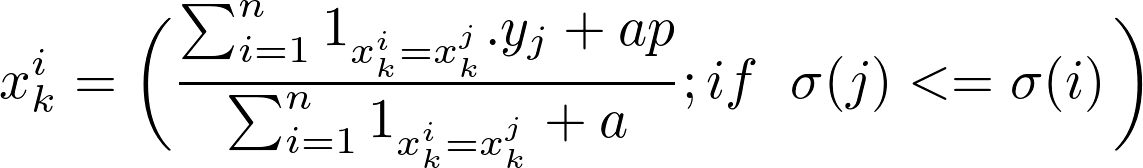

Secondly, for making algorithm prediction shift proof, it has proposed an algorithm which they named Ordered Boosting. At every iteration, it samples a new dataset D_t independently and obtain unshifted residuals (as this is sufficiently/somewhat(depends) different dataset) by applying current model to this dataset and fit a new model. Practically, they add new data points to previous points, so, it gives unshifted residuals atleast for the new data points which are added in current iteration.

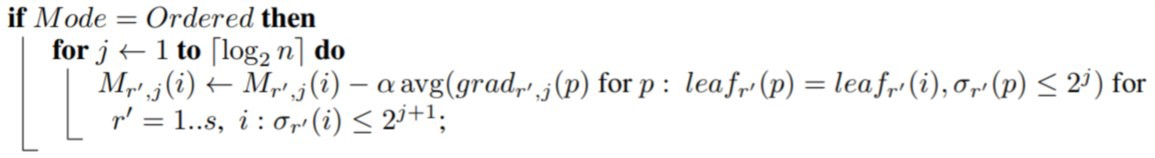

With this algorithm we can make ’n’ models if there are ’n’ examples. But we only make log_2(n) models, for time considerations. So, by this, first model is fitted to 2 examples, then second is fitted to 4 and so on.

CatBoost too uses a different kind of Decision Tree, called Oblivious Trees. In such trees the same splitting criterion is used across an entire level of the tree. Such trees are balanced and less prone to overfitting.

In oblivious trees each leaf index can be encoded as a binary vector with length equal to the depth of the tree. This fact is widely used in CatBoost model evaluator: it first binarizes all float features and all one-hot encoded features, and then uses these binary features to calculate model predictions. This helps in predicting at very fast speed.

As Data Scientists, we can easily train models and make predictions, but, we often fail to understand what’s happening inside those fancy algorithms. This is one of the reasons why we see a huge difference in model performance between offline evaluation and final production. It is high time we stop treating ML as a “black box” and give importance to model interpretation while improving model accuracy. This will also help us in identifying data biases. In this part, we will see how catboost helps us to analyze models and improve visibility with the following functionalities:

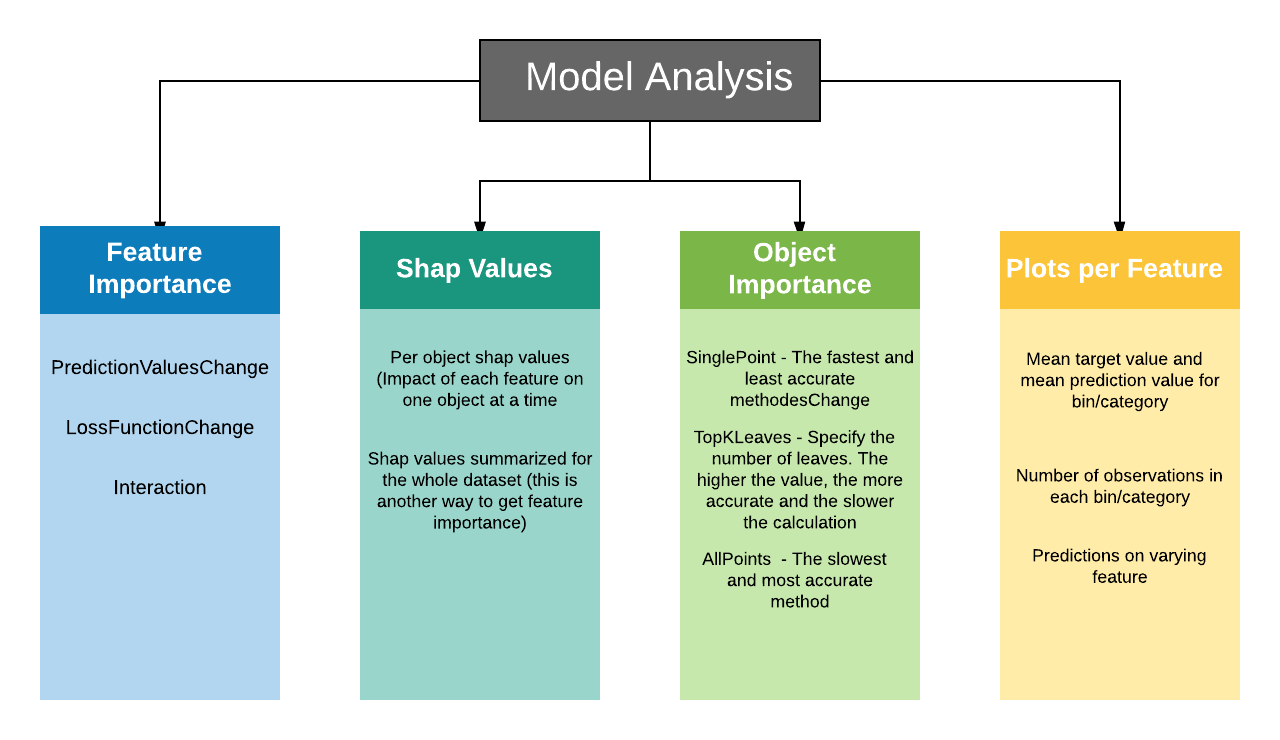

###### Catboost advantage

Catboost introduces the followign algorithmic advances:

1. An innovative algorithm for processing categorical features. No need to preprocess features on our own — it’s performed out of the box. For data with categorical features the accuracy would be better compare to other algorithm.
    
2. The implementation of ordered boosting, a permutation-driven alternative to the classic bosting algorithm. On small datasets, the GB is quickly overfitted. In Catboost there is a special modification for such cases. That is, on those datasets where other algorithms had a problem with overfitted we won’t observe the same problem on Catboost
    
3. Fast and easy to-use GPU-training. We can simply install it via pip-install
    
4. Other useful features: missing value support, great visualization

5. Performance: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.
    
6. Handling Categorical features automatically: We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. We can read more about it here.
    
7. Robust: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. We can read about all these parameters here.

8. Easy-to-use: We can use CatBoost from the command line, using an user-friendly API for both Python and R.


###### Categorical features

Categorical feature is one with a discrete set of values called categories that are not comparable to each other.

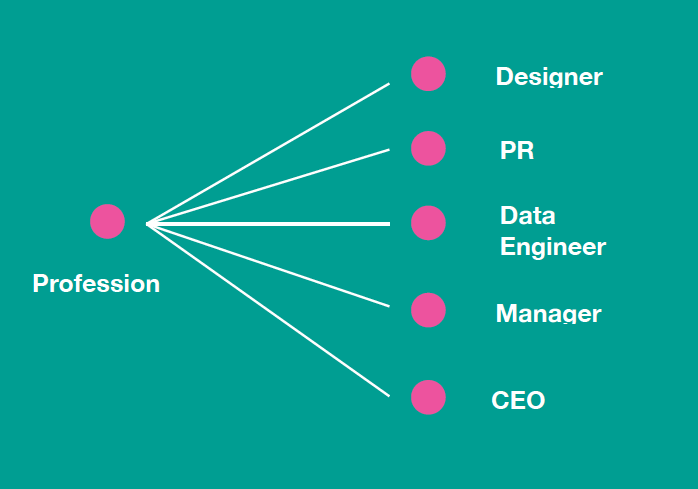

The main advantage of catboost is a smart preprocessing of categorical data. We don’t have to preprocess data on our own. Some of the most popular practices to encode categorical data are:

1. One-hot encoding

2. Label encoding

3. Hashing encoding
    
4. Target encoding
    
    and etc..

One-hot encoding is a popular approach for the categorical features with small number of distinct features. Catboost use one_hot_max_size for all features with number of different values less than or equal to the given parameter value.In the case features with high cardinality(like, e.g., “user ID” feature), such technique leads to infeasibly large number of new features.

Another popular method is to group categories by target statistics (TS) that estimate expected target value in each category.
The problem of such greedy approach is target leakage: the new feature is computed using target of the previous one. This leads to a conditional shift — the distribution differes for training and test examples.

The common methods for solving this problem are holdout TS and leave-one out TS. But still they doesn’t prevent model from target leakage.

CatBoost uses a more effective strategy. It relies on the ordering principle and called Target-Based with prior (TBS). It is inspired by online learning algorithms which get training examples sequentially in time. The values of TS for each example rely only on the observed history. To adapt this idea to standard offline setting, we introduce an artificial “time”, i.e., a random permutation σ of the training examples.

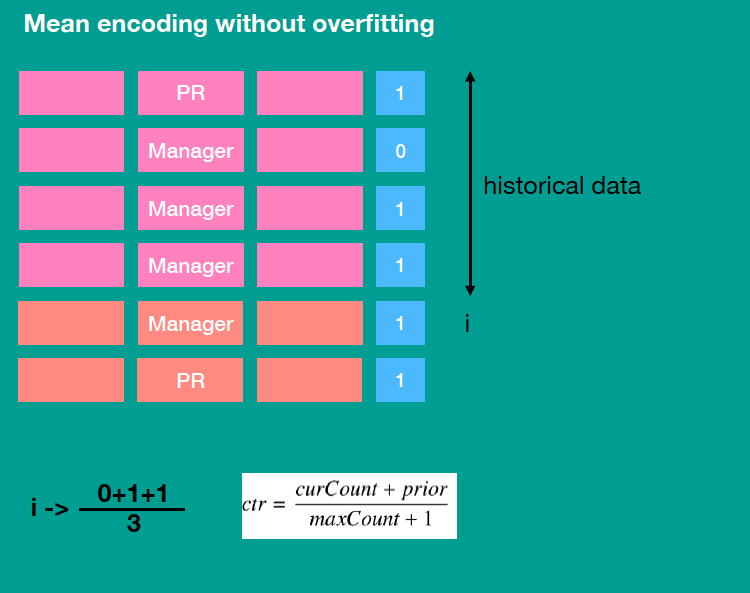

In Catboost, the data is randomly shuffled and mean is calculated for every object only on its historical data. Data can be reshuffled multiple times.

Another important detail of CatBoost is using combinations of categorical features as additional categorical features which capture high-order dependencies like joint informa- tion of user ID and ad topic in the task of ad click prediction. The number of possible combinations grows exponentially with the number of categorical features in the dataset, and it is infeasible to process all of them. CatBoost constructs combinations in a greedy way. Namely, for each split of a tree, CatBoost combines (concatenates) all categorical features (and their combinations) already used for previous splits in the current tree with all categorical features in the dataset. Combinations are converted to TS on the fly.

###### Why Catboost?
1). For Better Results

Catboost achieves the best results on the benchmark, and that’s great, yet I don’t know if I would replace a working production model for only a fraction of a log-loss improvement alone (especially when the company who conducted the benchmark has a clear interest in the favor of Catboost).
Though, when we look at datasets where categorical features play a large role, such as Amazon and the Internet datasets, this improvement becomes significant and undeniable.


2). Faster Predictions

While training time can take up longer than other GBDT implementations, prediction time is 13–16 times faster than the other libraries according to the Yandex benchmark.

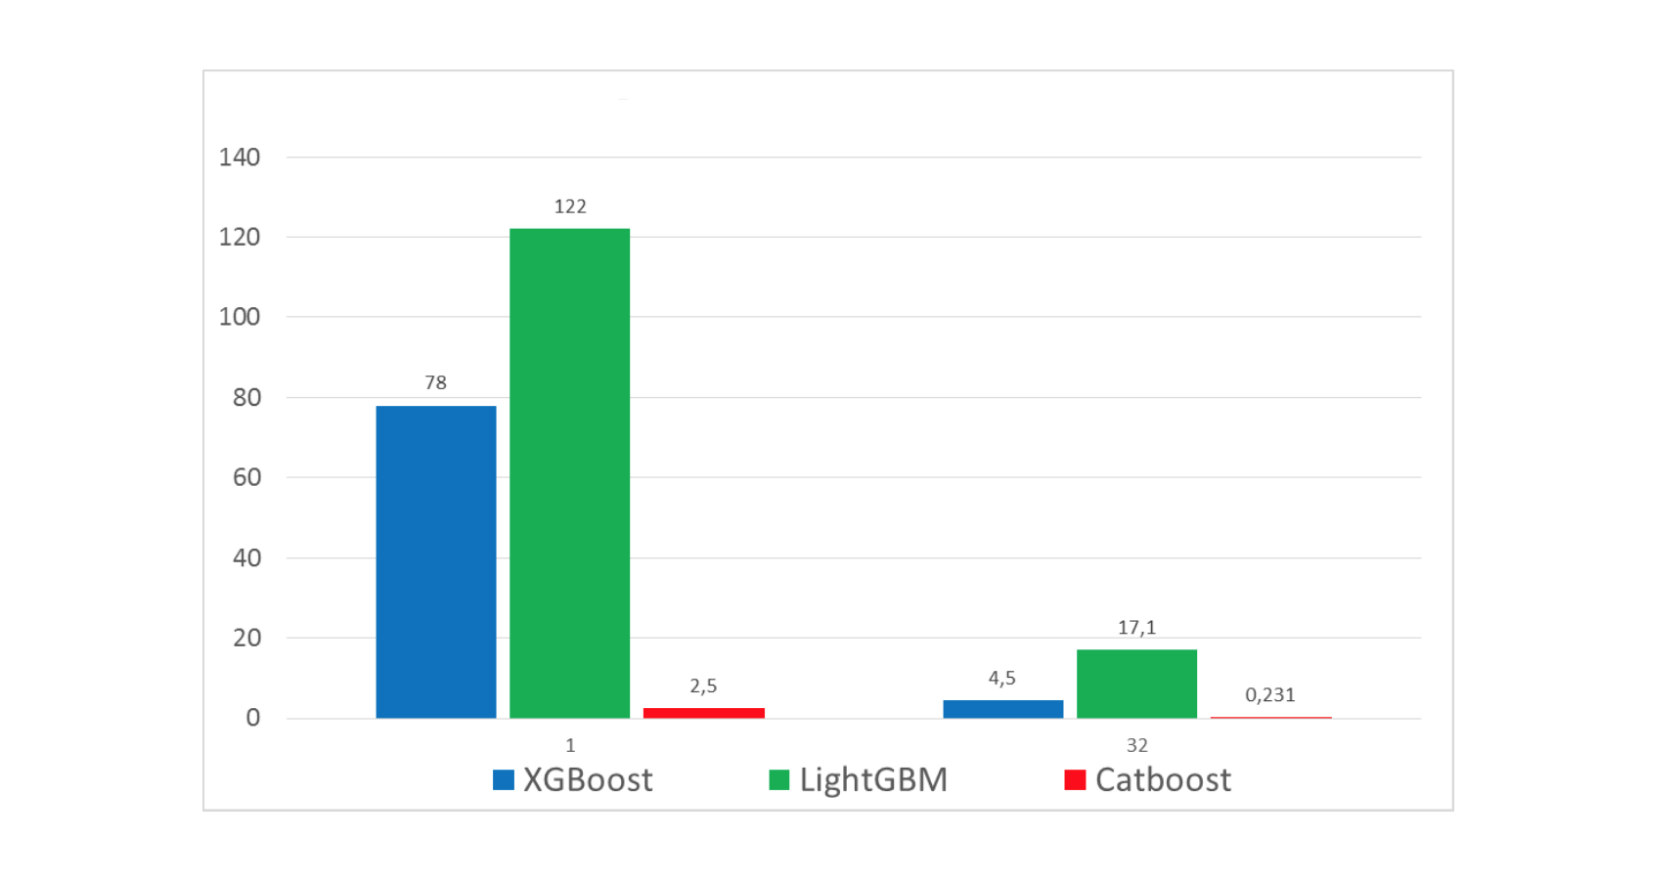

3). Batteries Included

Catboost’s default parameters are a better starting point than in other GBDT algorithms. And this is good news for those who want a plug and play model to start experience tree ensembles or Kaggle competitions.

### Conclusion:

###### catboost is an open-source gradient boosting algorithm which allows users to quickly handle categorical features for a large data set and this differentiates it from XGBoost & LightGBM. It's prediction time is 13–16 times faster than the other libraries.Catboost can be used to solve regression as well as classification problems. It is available as an open source library.

### 8) References

1. https://en.wikipedia.org/wiki/Bootstrap_aggregating

2. https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

3. https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

4. https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

5. https://arxiv.org/pdf/1603.02754.pdf

6. https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

7. https://towardsdatascience.com/gradient-boosting-machines-gbms-the-eli5-way-c4a21b2e2b0a